In [11]:
import argparse

import pandas as pd
import numpy as np
import scipy
import re
import gensim
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data/data_preprocessed.csv')

In [13]:
data['Title w2v'] = data['Title w2v'].apply(lambda s: [float(char) for char in s.strip('[]').replace('\n', '').split()])

In [14]:
nofired = data[data.Label == 0]
nofired = nofired['Title w2v'].values.flatten()
nofired = np.hstack(nofired).reshape(-1,300)
pca = PCA(n_components=2)
#principalComponents_nofired = pca.fit(nofired)
nofired_reduced = pca.fit_transform(nofired)
print(pca.explained_variance_ratio_)

[0.81568341 0.06423827]


In [15]:
fired = data[data.Label == 1]
fired = fired['Title w2v'].values.flatten()
fired = np.hstack(fired).reshape(-1,300)
fired_reduced = pca.fit_transform(fired)
print(pca.explained_variance_ratio_)

[0.76414238 0.07643907]


In [43]:
nofired_reduced.mean(0)

array([ 2.69759809e-14, -3.70775985e-15])

In [42]:
fired_reduced.mean(0)

array([-4.30119602e-15,  4.83729907e-15])

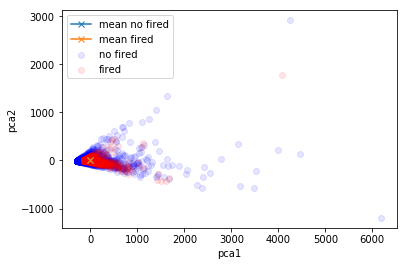

In [48]:
plt.scatter(nofired_reduced[:,0],nofired_reduced[:,1],color='blue',label='no fired',alpha=0.1)
plt.scatter(fired_reduced[:,0],fired_reduced[:,1],color='red',label='fired',alpha=0.1)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.plot(nofired_reduced.mean(0), marker="x",label='mean no fired')
plt.plot(fired_reduced.mean(0), marker="x",label='mean fired')
plt.legend()
plt.savefig('representation_cluster')

In [38]:
from gensim import *

In [39]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [40]:
fired_mean = fired.mean(0)

In [49]:
word2vec_model.similar_by_vector(fired_mean, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7627245187759399),
 ('Genetic_predisposition', 0.7557390928268433),
 ('glial_tumors', 0.7551911473274231),
 ('colorectal_adenoma', 0.7540744543075562),
 ('left_ventricular_diastolic', 0.7537558674812317),
 ('kidney_urologic', 0.7537197470664978),
 ('transfusion_syndrome', 0.7535445094108582),
 ('fibrin_deposition', 0.7534550428390503),
 ('fusion_enhancers', 0.748394250869751),
 ('hematopoietic_cancers', 0.7482747435569763)]

In [50]:
nofired_mean = nofired.mean(0)
word2vec_model.similar_by_vector(nofired_mean, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7715582847595215),
 ('transfusion_syndrome', 0.764104425907135),
 ('kidney_urologic', 0.7633569240570068),
 ('colorectal_adenoma', 0.7609511613845825),
 ('Genetic_predisposition', 0.759095311164856),
 ('fibrin_deposition', 0.757980465888977),
 ('left_ventricular_diastolic', 0.7575445175170898),
 ('glial_tumors', 0.7574530243873596),
 ('hematopoietic_cancers', 0.756256103515625),
 ('PLX_STROKE_targeting', 0.7526987791061401)]

In [51]:
diff = fired_mean - nofired_mean

In [54]:
word2vec_model.similar_by_vector(diff, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('E.Sadler_###-###', 0.5679095983505249),
 ('Ky.Busch_##-###', 0.5663482546806335),
 ('J.McMurray_###-###', 0.5564248561859131),
 ('M.Kenseth_###-###', 0.5538514852523804),
 ('K.Kahne_###-###', 0.5435614585876465),
 ('T.Stewart_##-###', 0.5292944312095642),
 ('Nasdaq_NASDAQ_TRIN', 0.514045774936676),
 ('http://www.ticketmaster.com_###-###-####', 0.49158334732055664),
 ('Marisa_Lenhard_CFA', 0.4847012758255005),
 ('J.Johnson_###-###', 0.47311121225357056)]

In [55]:
from sklearn.cluster import KMeans
random_state = 170
from sklearn.datasets import make_blobs
n_samples=100

In [56]:
data_flat = data['Title w2v'].values.flatten()
data_flat = np.hstack(data_flat).reshape(-1,300)

In [57]:
data_reduced = pca.fit_transform(data_flat)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(data_reduced)

In [58]:
true_labels=list(data.Label)

In [59]:
a = y_pred-true_labels

In [62]:
data['prediction KMEANS']=y_pred

In [82]:
nofired = data[data['prediction KMEANS'] == 0]
nofired = nofired['Title w2v'].values.flatten()
nofired = np.hstack(nofired).reshape(-1,300)
pca = PCA(n_components=2)
#principalComponents_nofired = pca.fit(nofired)
nofired_reducedkmean = pca.fit_transform(nofired)
print(pca.explained_variance_ratio_)

[0.68777225 0.08268568]


In [83]:
fired = data[data['prediction KMEANS'] == 1]
fired = fired['Title w2v'].values.flatten()
fired = np.hstack(fired).reshape(-1,300)
fired_reducedkmean = pca.fit_transform(fired)
print(pca.explained_variance_ratio_)

[0.65220025 0.12655287]


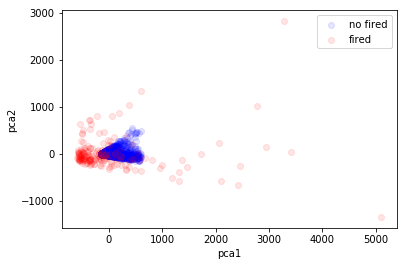

In [85]:
plt.scatter(nofired_reducedkmean[:,0],nofired_reducedkmean[:,1],color='blue',label='no fired',alpha=0.1)
plt.scatter(fired_reducedkmean[:,0],fired_reducedkmean[:,1],color='red',label='fired',alpha=0.1)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.savefig('representation_KMEANS')

In [61]:
list(a).count(0)/(len(a))

0.46452360266434983

In [68]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [69]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')

In [70]:
y_pred_gmm = gmm.fit_predict(data_reduced)

In [71]:
a_gmm = y_pred_gmm-true_labels

In [72]:
list(a_gmm).count(0)/len(a_gmm)

0.42021430640023166

In [73]:
data['prediction gaussian']=y_pred_gmm

In [76]:
nofired = data[data['prediction gaussian'] == 0]
nofired = nofired['Title w2v'].values.flatten()
nofired = np.hstack(nofired).reshape(-1,300)
pca = PCA(n_components=2)
#principalComponents_nofired = pca.fit(nofired)
nofired_reducedgmm = pca.fit_transform(nofired)
print(pca.explained_variance_ratio_)

[0.71219339 0.03579946]


In [77]:
fired = data[data['prediction gaussian'] == 1]
fired = fired['Title w2v'].values.flatten()
fired = np.hstack(fired).reshape(-1,300)
fired_reducedgmm = pca.fit_transform(fired)
print(pca.explained_variance_ratio_)

[0.73873399 0.08840933]


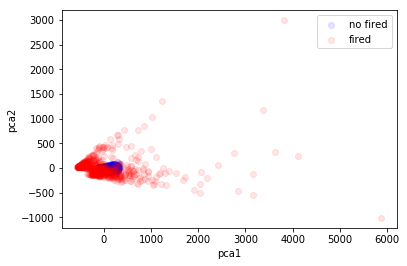

In [86]:
plt.scatter(nofired_reducedgmm[:,0],nofired_reducedgmm[:,1],color='blue',label='no fired',alpha=0.1)
plt.scatter(fired_reducedgmm[:,0],fired_reducedgmm[:,1],color='red',label='fired',alpha=0.1)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.savefig('representation_gmm')